In [233]:
import pandas as pd
import sklearn
import numpy as np
import scipy as sp
import operator
import csv
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from fuzzywuzzy import fuzz
from sklearn.feature_extraction.text import CountVectorizer
import operator

matplotlib.style.use('ggplot')
%matplotlib notebook 

In [234]:
df = pd.read_json('./data/cream_sephora.json')

In [235]:
for i in df.columns: 
    print i

brand
category
five_star_reviews
four_star_reviews
ingredient
lastpage
name
number_loves
number_reviews
one_star_reviews
price
review_rating
reviews
size
sku
three_star_reviews
two_star_reviews


In [236]:
df.head()

,brand,category,five_star_reviews,four_star_reviews,ingredient,lastpage,name,number_loves,number_reviews,one_star_reviews,price,review_rating,reviews,size,sku,three_star_reviews,two_star_reviews
0,[Embryolisse],[Mists &amp; Essences],"[7, 7]","[1, 1]","[Water, Glycerin, Prunus Armeniaca Kernel Oil,...",[4],"[, Hydra-Mat Emulsion]",[2625],[18 reviews],"[4, 4]",[$40.00],[3.2222],"[{'title': u'Not Mat', 'text': [u'I was hoping...",NaN,[P393524],"[3, 3]","[3, 3]"
1,[Kate Somerville],[Face Oils],"[67, 67]","[20, 20]","[Ethyl Macadamiate, Coconut Oil , Moringa Olei...",[21],"[, Dilo Oil Restorative Treatment]",[3133],[102 reviews],"[2, 2]",[$65.00],[4.4118],"[{'title': u'Just Okay', 'text': [u'I am a str...",NaN,[P382353],"[7, 7]","[6, 6]"
2,[Eve Lom],[Moisturizers],NaN,NaN,"[Water, Butyrospermum Parkii (Shea) Oil, Isono...",NaN,"[, TIME RETREAT Face Treatment]",[79],[not rated],NaN,[$110.00],[0.0],NaN,NaN,[P414079],NaN,NaN
3,[Dr. Jart+],[Mists &amp; Essences],"[24, 24]","[4, 4]","[Water, Dipropylene Glycol, Butylene Glycol, P...",[8],"[, PORE MEDIC Pore Minish Mist]",[4531],[40 reviews],"[5, 5]",[$30.00],[3.95],"[{'title': u'misty fresh!', 'text': [u'I love ...",NaN,[P385321],"[3, 3]","[4, 4]"
4,[REN],[Moisturizers],"[66, 66]","[19, 19]","[Rosa Damascena Flower Water, Caprylic/Capric ...",[20],"[, Ultra Moisture Day Cream]",[1855],[99 reviews],"[4, 4]",[$55.00],[4.3939],"[{'title': None, 'text': [u'This product is no...",NaN,[P214000],"[5, 5]","[5, 5]"


In [237]:
for index, row in df.iterrows(): 
    try: 
        df.loc[index, 'brand'] = row['brand'][0]
    except: 
        df.loc[index, 'brand'] = ''
        pass
    
    try:
        df.loc[index, 'number_reviews'] = int(row['number_reviews'][0].split()[0])
    except:
        df.loc[index, 'number_reviews'] = 0
        pass
    
    try: 
        df.loc[index, 'one_star_reviews'] = int(row['one_star_reviews'][0])
    except: 
        df.loc[index, 'one_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'two_star_reviews'] = int(row['two_star_reviews'][0])
    except: 
        df.loc[index, 'two_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'three_star_reviews']  = int(row['three_star_reviews'][0])
    except: 
        df.loc[index, 'three_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'four_star_reviews'] = int(row['four_star_reviews'][0])
    except: 
        df.loc[index, 'four_star_reviews'] = 0 
        pass
    try: 
        df.loc[index, 'five_star_reviews'] = int(row['five_star_reviews'][0])
    except: 
        df.loc[index, 'five_star_reviews'] = 0
        pass
    try: 
        df.loc[index, 'price'] = float(row['price'][0].replace('$', ''))
    except: 
        df.loc[index, 'price'] = .0
        pass
    
    try: 
        df.loc[index, 'review_rating'] = float(row['review_rating'][0])
    except:
        df.loc[index, 'review_rating'] = .0
        pass
    
    try: 
        df.loc[index, 'name'] = row['name'][-1]
    except:
        df.loc[index, 'name'] = ''
        pass
    
    try: 
        df.loc[index, 'number_loves'] = int(row['number_loves'][-1])
    except:
        df.loc[index, 'number_loves'] = .0
        pass
    
    try: 
        df.loc[index, 'category'] = row['category'][-1]
    except: 
        df.loc[index, 'category'] = ''
        pass 

In [238]:
print df['number_reviews'].sum()
print df['one_star_reviews'].sum()
print df['two_star_reviews'].sum()
print df['three_star_reviews'].sum()
print df['four_star_reviews'].sum()
print df['five_star_reviews'].sum()

122495
7762
7593
9127
20917
55170


<IPython.core.display.Javascript object>


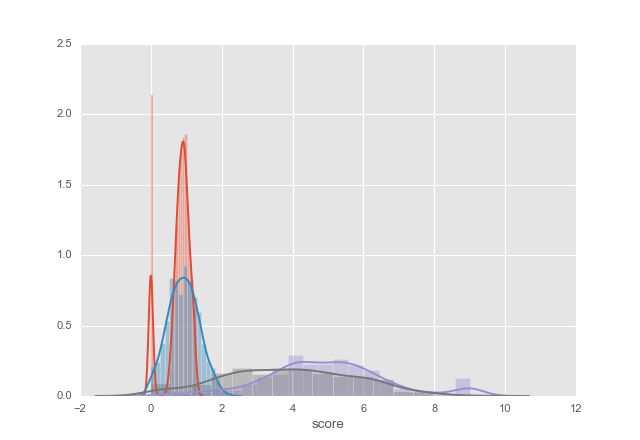

In [239]:
#sns.distplot(df['number_loves'])
#sns.distplot(df['number_loves'].apply(lambda x: np.sqrt(np.power(x, 1./5))))
#sns.distplot(df['number_reviews'].apply(lambda x: np.sqrt(np.log(x + 1))))
#sns.distplot(df['review_rating'].apply(lambda x: (x - 2.)**2))

sns.distplot(df['number_loves'].apply(lambda x: 0.2*np.power(x, 1./5)))
sns.distplot(df['number_reviews'].apply(lambda x: 0.25*np.log(x + 1)))
sns.distplot(df['review_rating'].apply(lambda x: (x - 2.)**2))

In [247]:
df.loc[:, 'n_loves_transform'] = df['number_loves'].apply(lambda x: .2*np.power(x, 1./5))

In [248]:
df.loc[:, 'n_reviews_transform'] = df['number_reviews'].apply(lambda x: .25*np.log(x + 1))

In [249]:
df.loc[:, 'review_rating_transform'] = df['review_rating'].apply(lambda x: (x - 2.)**2)

In [250]:
def cal_score(row): 
    if row['n_loves_transform'] < 0.0001: 
        return row['n_reviews_transform']*row['n_reviews_transform']
    elif row['n_reviews_transform'] < 0.0001: 
        return row['n_loves_transform']*row['n_loves_transform']
    else: 
        return np.sqrt((row['n_loves_transform']*row['n_reviews_transform']
                       ))*row['review_rating_transform'] 

In [251]:
df.loc[:, 'score'] = df.apply(cal_score, axis = 1)

<IPython.core.display.Javascript object>


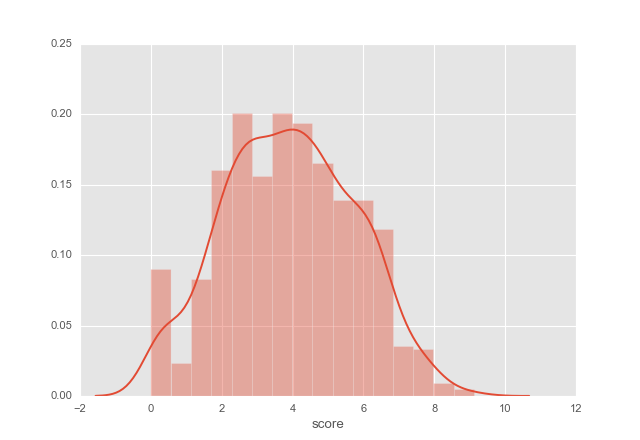

In [252]:
sns.distplot(df['score'])

In [231]:
df[['brand', 'name', 'number_loves', 'number_reviews', 'score', 'review_rating']].sort(['score'], ascending=[0])

/Users/amy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,brand,name,number_loves,number_reviews,score,review_rating
520,Son &amp; Park,Beauty Water,7231,55,18.459801,4.8909
603,Herbivore,Phoenix Cell Regenerating Facial Oil,3916,48,16.554567,4.7917
512,Josie Maran,100% Pure Argan Oil and 100% Pure Argan Oil Li...,5042,7,16.552337,5
602,Shiseido,Ibuki Beauty Sleeping Mask,8837,107,16.438574,4.6636
508,Shiseido,Bio-Performance Advanced Super Revitalizing Cream,7223,291,16.417517,4.6117
609,Tatcha,Gold Camellia Beauty Oil,7814,21,16.384304,4.8095
486,SK-II,R.N.A. POWER Radical New Age Cream,1461,10,16.122507,5
300,Lancôme,Visionnaire Advanced Multi-Correcting Cream,984,12,16.075406,5
604,Herbivore,Lapis Oil Balancing Facial Oil,5768,118,15.836067,4.6356
683,Dr Roebuck’s,PURE Face Moisturizer,831,17,15.785836,4.9412


In [253]:
df_brand = df.groupby('brand')

In [254]:
df.to_csv("./data/sephora_all.csv", encoding = 'utf-8')

In [ ]:
df_brand.get_group('Son &amp; Park')

In [ ]:
brand_score = df_brand['score'].agg([np.count_nonzero, np.std, np.mean]).sort_values('mean', ascending = False)

In [ ]:
df_brand['score'].agg([np.count_nonzero, np.std, np.mean]).sort_values('mean', ascending = False)

In [ ]:
brand_score.to_csv("./data/brand_score.csv", encoding = 'utf-8')

In [22]:
dictind = {}
with open('syn.csv') as f: 
    r = csv.DictReader(f)
    for row in r: 
        dictind[row['DictName'].lower()] = row['DictName'].lower()
        for col in ['name1', 'name2', 'name3', 'name4', 'name5', 'name6']:
            if row[col] != '':
                dictind[row[col].lower()] = row['DictName'].lower()

In [27]:
all_ind = []
for k, v in dictind.iteritems(): 
    all_ind.append(v)
all_ind = list(set(all_ind))

In [29]:
# Build Dictionary
tempDict = {}
for index, row in df.iterrows(): 
    try: 
        indlist = row['ingredient'][0].split(',')
    except: 
        continue    
        
    for ind in indlist: 
        ind = ind.strip('-')
        ind = ind.strip()
        ind = re.sub(r'\*', '', ind)
        ind = re.sub(r'\.', '', ind)
        ind = re.sub(r'\+', '', ind)
        ind = ind.lower()
        found = 0
        
        # first search dict
        for k, v in dictind.iteritems(): 
            k_list = k.split('&')
            a = k_list[0].strip().lower()
            b = k_list[-1].strip().lower()
            if ind.find(a) > -1 and ind.find(b) > -1: 
                ind = dictind[k].lower()
                break
            
        try: 
            tempDict[ind] += 1
        except: 
            tempDict[ind] = 1

In [31]:
tempDict_sorted = sorted(tempDict, key=tempDict.get, reverse = True)

In [33]:
for i in tempDict_sorted: 
    if i == '': 
        continue
    found = 0
    for j in all_ind:
        if j == '': 
            continue
        if fuzz.partial_ratio(i, j) > 80: 
            dictind[i] = j
            found = 1
            break
            
    if found == 0: 
        all_ind.append(i)
        dictind[i] = i

In [34]:
with open('syn.json', 'w') as f:
    json.dump(dictind, f)

In [37]:
with open('syn.json', 'r') as f: 
    dictnew = json.load(f)

In [41]:
dictnew

{u'gardenia florida fruit extract': u'gardenia florida fruit extract',
 u'camellia oleifera seed oil': u'camellia japonica seed oil',
 u'averrhoa carambola leaf extract': u'averrhoa carambola leaf extract',
 u'echinacea purpurea root extract': u'urea',
 u'fractionated coconut oil': u'fractionated coconut oil',
 u'dipentaerythrityl hexahydroxy stearate/stearate/rosinate': u'erythritol',
 u'cetearyl ethylhexanoate': u'cetearyl ethylhexanoate',
 u'pinus sylvestris leaf oil': u'pinus sylvestris leaf oil',
 u'ammonium acryloyl dimethyltaurate/carboxyethyl acrylate crosspolymer': u'hydroxyethyl acrylate',
 u'panthenol (pro vitamin b5)': u'panthenol',
 u'cananga odorata': u'cananga odorata flower oil',
 u'persea gratissima': u'persea gratissima (avocado) oil',
 u'hydrogenated phosphatidylcholine': u'phosphatidylcholine',
 u'benzyl alcohol': u'benzyl alcohol',
 u'lysolecithin': u'lecithin',
 u'tributyl citrate': u'citral',
 u'thymus serpillum extract': u'thymus serpillum extract',
 u'peg-75 st

In [211]:
for index, row in df.iterrows(): 
    new_ingredients = ['']
    
    try: 
        indlist = row['ingredient'][0].split(',')
    except: 
        df.loc[index, 'new_ingredients'] = ''
        continue
        
    for ind in indlist: 
        ind = ind.strip('-')
        ind = ind.strip()
        ind = re.sub(r'\*', '', ind)
        ind = re.sub(r'\.', '', ind)
        ind = re.sub(r'\+', '', ind)
        ind = ind.lower()
        
        found = 0
        try: 
            ind = dictnew[ind]
            found = 1
        except: 
            # first search dict
            for k, v in dictnew.iteritems(): 
                k_list = k.split('&')
                a = k_list[0].strip()
                b = k_list[-1].strip()
                if ind.find(a) > -1 and ind.find(b) > -1: 
                    ind = dictnew[k]
                    found = 1
                    break
        
        ind = re.sub('[^0-9a-zA-Z]+', 'XXX', ind)
        if found == 1: 
            new_ingredients.append(ind)
            continue
            
        new_ingredients.append(ind)
        
    df.set_value(index, 'new_ingredients', ' '.join(new_ingredients))

In [212]:
df[['ingredient', 'new_ingredients']]

,ingredient,new_ingredients
0,"[Water, Glycerin, Prunus Armeniaca Kernel Oil,...",citrusXXXaurantiumXXXbergamiaXXXbergamotXXXfr...
1,"[Ethyl Macadamiate, Coconut Oil , Moringa Olei...",ethylXXXmacadamiate cocosXXXnuciferaXXXcoconu...
2,"[Water, Butyrospermum Parkii (Shea) Oil, Isono...",citrusXXXaurantiumXXXbergamiaXXXbergamotXXXfr...
3,"[Water, Dipropylene Glycol, Butylene Glycol, P...",citrusXXXaurantiumXXXbergamiaXXXbergamotXXXfr...
4,"[Rosa Damascena Flower Water, Caprylic/Capric ...",chamomillaXXXrecutitaXXXmatricariaXXXflowerXX...
5,"[Water, Aloe Barbadensis Leaf Juice, Caprylic/...",citrusXXXaurantiumXXXbergamiaXXXbergamotXXXfr...
6,NaN,
7,"[Water, Glycerin, Propanediol, Methoxycinnamid...",citrusXXXaurantiumXXXbergamiaXXXbergamotXXXfr...
8,"[C12-15 Alkyl Benzoate, Octyldodecanol, Phenyl...",alkylXXXbenzoate octyldodecanol phenylXXXtrim...
9,NaN,


In [213]:
vectorizer = CountVectorizer(min_df=1)
corpus = df['new_ingredients']
X = vectorizer.fit_transform(corpus)
len(vectorizer.get_feature_names())

1372

In [214]:
X = X.toarray()

In [215]:
y = np.asarray(df['score'], dtype="|S6")

In [195]:
X.shape

(742, 2063)

In [196]:
y.shape

(742,)

In [208]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesRegressor

In [198]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [130]:
clf = ExtraTreesRegressor(n_estimators=200).fit(X, y)

In [134]:
clf.score(X.astype(np.float), y.astype(np.float))

0.73612364055119228

In [135]:
clf.feature_importances_

array([  2.07349433e-04,   2.30882679e-04,   1.05282428e-06, ...,
         1.84108332e-04,   1.36531332e-05,   2.15600167e-05])

In [218]:
n_feature = 50
def feature_im(X, y, color_input='y'): 
    
    forest = ExtraTreesClassifier(n_estimators=250,random_state = int(np.random.random(1)*3521))
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    """
    plt.figure(figsize = (12, 7))
    plt.title(("Feature ranking"))
    plt.bar(range(n_feature), importances[indices[:n_feature]],
           color=color_input, yerr=std[indices[:n_feature]], align="center")
    plt.xticks(range(n_feature), [vectorizer.get_feature_names()[i] for i in indices[:n_feature]], rotation=90)
    plt.xlim([-1, n_feature])
    """
    for i in indices[:n_feature]: 
        print vectorizer.get_feature_names()[i].replace('xxx', ' ')
    #plt.savefig('f_importance_' + condition + p_predict + '.jpg')

In [200]:
forest = ExtraTreesClassifier(n_estimators=250,random_state = int(np.random.random(1)*3521))
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [157]:
[vectorizer.get_feature_names()[i] for i in indices[:5]]

[u'capric_triglyceride',
 u'_root_extract',
 u'caprylic',
 u'carbomer',
 u'licorice']

In [153]:
vectorizer.get_feature_names()[400, 123, 405, 411, 991]

TypeError: list indices must be integers, not tuple

In [155]:
type(df.columns)

pandas.indexes.base.Index

In [219]:
feature_im(X, y)

glycyrrhiza glabra licorice root extract
caprylic capric triglyceride
citrus aurantium bergamia bergamot fruit water oil extract
citric acid
fragrance parfum 
carbomer
dimethicone vinyl dimethicone crosspolymer
tocopherol vitamin e
linalool
disodium edta
butyrospermum parkii shea butter
glyceryl stearate
cetearyl alcohol
butylene glycol
sodium hydroxide
sodium hyaluronate
neopentyl glycol dicaprylate dicaprate
tocopheryl acetate
caprylyl glycol
xanthan gum
silica
squalane
phenoxyethanol
limonene
polysorbate 20
potassium sorbate
algae extract
ascorbyl glucoside
c13 14 isoparaffin
cyclopentasiloxane
simmondsia chinensis jojoba seed oil
panthenol
helianthus annuus sunflower seed oil
titanium dioxide ci 77891 
citral
sodium benzoate
geraniol
vitis vinifera grape seed extract
acrylates c10 30 alkyl acrylate crosspolymer
citronellol
elaeis guineensis palm kernel oil
propanediol
benzyl alcohol
lecithin
rosmarinus officinalis rosemary leaf extract
mica
hexylene glycol
dipropylene glycol
persea

In [98]:
clf = LassoCV().fit(X, y)

/Users/amy/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [99]:
model = SelectFromModel(clf, prefit=True)

In [100]:
X_new = model.transform(X)

/Users/amy/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [105]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [119]:
f = SelectKBest(f_regression, k = 50)
X_new = f.fit_transform(X.astype(np.float), y.astype(np.float))

In [120]:
X_new.shape

(742, 50)

In [ ]:
def dict_hist(d, h): 
    try: 
        d.loc[h, 'n_products'] += 1
    except: 
        d.loc[h, :] = 0.
        d.loc[h, 'n_products'] = 1
    return d

def list_hist(d, h, content, col): 
    try: 
        d.loc[h, col].append(content)
    except AttributeError: 
        d.loc[h, col] = [content]
    return d

def review_hist(d, h, review, col): 
    d.loc[h, col] += review
    return d 

In [ ]:
dicthist = pd.DataFrame(columns = ['n_products', 'n_brands', 'n_reviews', 'n_firststar', 
                                  'n_secondstar', 'n_thirdstar', 'n_fourstar', 'n_fivestar',
                                  'price', 'avg_reviews'])
for index, row in df.iterrows(): 
    brand = row['brand']
    n_reviews = row['number_reviews']
    first_r = row['one_star_reviews']
    second_r = row['two_star_reviews']
    third_r = row['three_star_reviews']
    four_r = row['four_star_reviews']
    five_r = row['five_star_reviews']
    price = row['price']
    review_rating = row['review_rating']
    
    try: 
        indlist = row['ingredient'][0].split(',')
    except: 
        continue
    
    for ind in indlist: 
        ind = ind.strip('-').strip()
        ind = re.sub(r'\*', '', ind)
        ind = re.sub(r'\.', '', ind)
        found = 0
        
        # first search dict
        for k, v in dictind.iteritems(): 
            k_list = k.split('&')
            a = k_list[0].strip()
            b = k_list[-1].strip()
            if ind.find(a) > -1 and ind.find(b) > -1: 
                dict_hist(dicthist, dictind[k])
                list_hist(dicthist, dictind[k], brand, 'n_brands')
                review_hist(dicthist, dictind[k], n_reviews, 'n_reviews')
                review_hist(dicthist, dictind[k], first_r, 'n_firststar')
                review_hist(dicthist, dictind[k], second_r, 'n_secondstar')
                review_hist(dicthist, dictind[k], third_r, 'n_thirdstar')
                review_hist(dicthist, dictind[k], four_r, 'n_fourstar')
                review_hist(dicthist, dictind[k], five_r, 'n_fivestar')
                
                list_hist(dicthist, dictind[k], price, 'price')
                
                list_hist(dicthist, dictind[k], review_rating, 'avg_reviews')
                """"""
                found = 1
                break
        if found == 1:
            continue     
        dict_hist(dicthist, ind)
        list_hist(dicthist, ind, brand, 'n_brands')
        review_hist(dicthist, ind, n_reviews, 'n_reviews')
        review_hist(dicthist, ind, first_r, 'n_firststar')
        review_hist(dicthist, ind, second_r, 'n_secondstar')
        review_hist(dicthist, ind, third_r, 'n_thirdstar')
        review_hist(dicthist, ind, four_r, 'n_fourstar')
        review_hist(dicthist, ind, five_r, 'n_fivestar')
        
        list_hist(dicthist, ind, price, 'price')
        
        list_hist(dicthist, ind, review_rating, 'avg_reviews')
        """"""

In [ ]:
dicthist.loc['Avena Sativa (Oat) Kernel Extract',:]
#"Avena Sativa (Oat) Kernel Extract"

In [ ]:
for index, row in dicthist.iterrows():
    dicthist.loc[index, 'n_brand'] = len(set(dicthist.loc[index, 'n_brands']))
    dicthist.loc[index, 'avg_review'] = np.mean(dicthist.loc[index, 'avg_reviews'])
    dicthist.loc[index, 'price_v'] = np.mean(dicthist.loc[index, 'price'])

In [ ]:
dicthist

In [ ]:
dicthist.to_csv("./data/sephora_cream.csv", encoding = 'utf-8')

In [ ]:
df_ulta = pd.read_json('./data/ulta-cream.json')
for index, row in df_ulta.iterrows():
    df_ulta.loc[index, 'brand'] = df_ulta.loc[index, 'brand'][0]
    df_ulta.loc[index, 'name'] = df_ulta.loc[index, 'name'][0]
    try:
        df_ulta.loc[index, 'number_reviews'] = df_ulta.loc[index, 'number_reviews'][0]
    except: 
        df_ulta.loc[index, 'number_reviews'] = 0
    df_ulta.loc[index, 'price'] = df_ulta.loc[index, 'price'][0]

In [ ]:
brand_list = set(list(df_ulta['brand'].unique()) + list(df['brand'].unique()))

In [ ]:
sorted(brand_list)

In [ ]:
name_list = set(list(df_ulta['name'].unique()) + list(df['name'].unique()))

In [ ]:
len(name_list)

In [ ]:
print len(list(df_ulta['brand'].unique()))
print len(list(df['brand'].unique()))

In [ ]:
print len(list(df_ulta['name'].unique()))
print len(list(df['name'].unique()))
print len(name_list)

In [ ]:
sorted(name_list)

In [ ]:
df[(df['brand'] == "Eve Lom")]

In [ ]:
dicthist.head()

In [ ]:
%matplotlib inline

In [ ]:
sns.set_style("white")

In [ ]:
brand_list = set(list(df_ulta['name'].unique()) + list(df['name'].unique()))